<a href="https://colab.research.google.com/github/steffiangel/Predictive-Analytics/blob/main/Lab5_PA_CustomerSegementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mall Customer Segmentation**


**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import datasets

In [ ]:
df=pd.read_csv("/content/customer_data.csv")
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


**Descriptive analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [ ]:
df.shape

(8068, 11)

In [ ]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


### **Pre-processing**

In [ ]:
df.dtypes

,0
ID,int64
Gender,object
Ever_Married,object
Age,int64
Graduated,object
Profession,object
Work_Experience,float64
Spending_Score,object
Family_Size,float64
Var_1,object


In [ ]:
#finding missing values
df.isna().sum(axis=0)

,0
ID,0
Gender,0
Ever_Married,140
Age,0
Graduated,78
Profession,124
Work_Experience,829
Spending_Score,0
Family_Size,335
Var_1,76


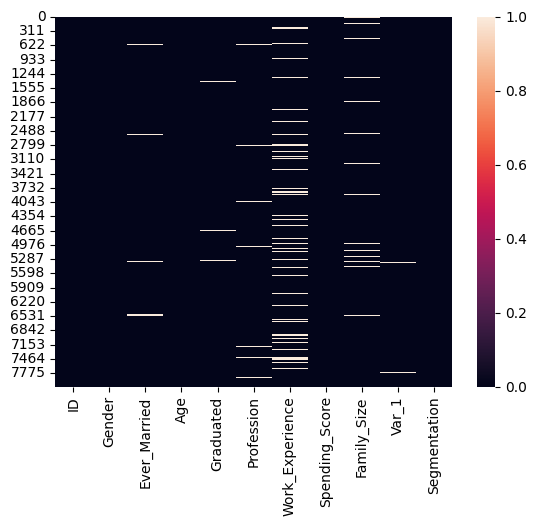

In [ ]:
sns.heatmap(df.isnull());

As we can see from the dataset, there are many values which are missing. We will try to delete as minimal as possible for categorical value and for others we will put mean imputation.

In [ ]:
#filling missing values for non-categorical columns
df['Work_Experience'].fillna(df['Work_Experience'].mean(), inplace = True)
df['Family_Size'].fillna(df['Family_Size'].mean(), inplace = True)

<ipython-input-17-65c1cee4588c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Work_Experience'].fillna(df['Work_Experience'].mean(), inplace = True)
<ipython-input-17-65c1cee4588c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
df.isna().sum(axis=0)

,0
ID,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0
Var_1,0


In [ ]:
#dropping ID column
df=df.drop(columns=["ID"])

In [ ]:
temp = df.describe()
temp.style.background_gradient(cmap='pink')

,Age,Work_Experience,Family_Size
count,7669.000000,7669.000000,7669.000000
mean,43.508541,2.636749,2.847449
std,16.689330,3.234815,1.498570
min,18.000000,0.000000,1.000000
25%,31.000000,0.000000,2.000000
50%,40.000000,1.000000,2.850123
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


In [ ]:
#finding outliers using box-plot- Age column
g= px.box(df, y='Age')
g.show()
%matplotlib inline

In [ ]:
#finding outliers using box-plot- work_experience column
g= px.box(df, y='Work_Experience')
g.show()

In [ ]:
#finding outliers using box-plot- Family_size column
g= px.box(df, y='Family_Size')
g.show()

From this we can see that there are not much outliers in the data.

In [ ]:
#distribution of Age column
fig2 = px.histogram(df,x='Age',color='Age')
fig2.show()

In [ ]:
#distribution of Gender column
fig2 = px.histogram(df,x='Gender',color='Gender')
fig2.show()

In [ ]:
fig2 = px.histogram(df,x='Ever_Married',color='Ever_Married')
fig2.show()

In [ ]:
fig2 = px.histogram(df,x='Graduated',color='Graduated')
fig2.show()

In [ ]:
#Label encoding the categorical columns
l = LabelEncoder()
df['Gender'] = l.fit_transform(df['Gender'])
df['Ever_Married'] = l.fit_transform(df['Ever_Married'])
df['Graduated'] = l.fit_transform(df['Graduated'])
df['Spending_Score'] = l.fit_transform(df['Spending_Score'])
df['Var_1'] = l.fit_transform(df['Var_1'])
df['Profession'] = l.fit_transform(df['Profession'])
df['Family_Size'] = l.fit_transform(df['Family_Size'])
df['Work_Experience'] = l.fit_transform(df['Work_Experience'])
df['Segmentation'] = l.fit_transform(df['Segmentation'])

In [ ]:
df.corr()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
Gender,1.000000,0.115969,0.026189,-0.037708,0.025223,-0.054704,-0.053235,0.063276,0.030249,0.028376
Ever_Married,0.115969,1.000000,0.567080,0.194850,-0.139545,-0.091312,-0.633192,-0.087627,0.085571,-0.218000
Age,0.026189,0.567080,1.000000,0.237753,0.044231,-0.182268,-0.269250,-0.291384,0.169085,-0.241352
Graduated,-0.037708,0.194850,0.237753,1.000000,-0.295588,0.031116,-0.152554,-0.232898,0.122263,-0.175375
Profession,0.025223,-0.139545,0.044231,-0.295588,1.000000,-0.026418,0.233509,0.085922,-0.038261,0.207999
Work_Experience,-0.054704,-0.091312,-0.182268,0.031116,-0.026418,1.000000,0.049896,-0.067738,0.021094,0.010097
Spending_Score,-0.053235,-0.633192,-0.269250,-0.152554,0.233509,0.049896,1.000000,-0.111401,-0.036247,0.096572
Family_Size,0.063276,-0.087627,-0.291384,-0.232898,0.085922,-0.067738,-0.111401,1.000000,-0.140955,0.199919
Var_1,0.030249,0.085571,0.169085,0.122263,-0.038261,0.021094,-0.036247,-0.140955,1.000000,-0.019042
Segmentation,0.028376,-0.218000,-0.241352,-0.175375,0.207999,0.010097,0.096572,0.199919,-0.019042,1.000000


Model Building

In [ ]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,5,1,2,4,3,3
1,0,1,38,1,2,3,0,3,3,0
2,0,1,67,1,2,1,2,0,5,1
3,1,1,67,1,7,0,1,1,5,1
4,0,1,40,1,3,3,1,6,5,0


In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

### **K-Means**

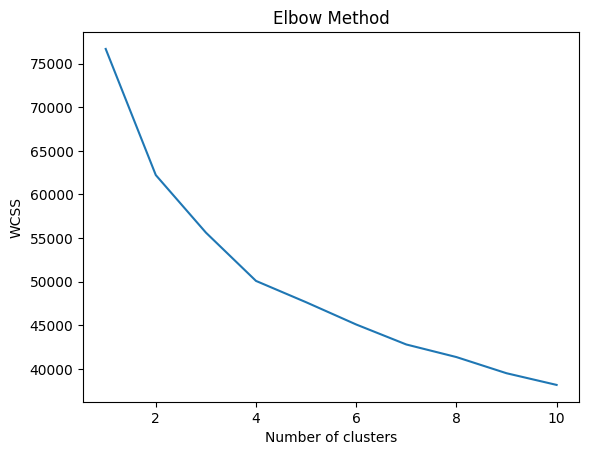

In [ ]:
#finding best no. of clusters using elbow method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

Text(0.5, 1.0, 'Silhouette Score')

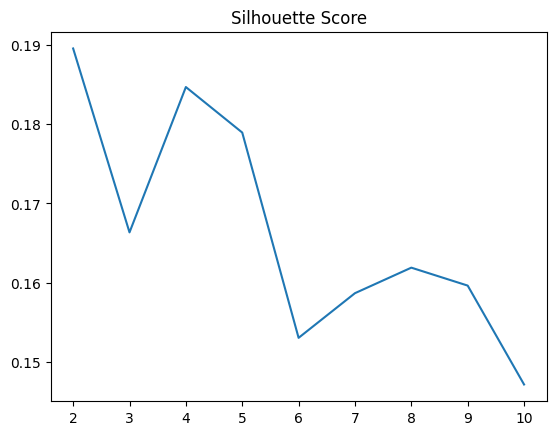

In [ ]:
#printing silhuotte score for different clusters
from sklearn.metrics import silhouette_score
s=[]
for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled,kmeans.labels_)
    s.append(score)
plt.plot(range(2,11),s)
plt.title("Silhouette Score")

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_scaled)
labels = kmeans.labels_

In [ ]:
labels, len(labels)

(array([2, 0, 1, ..., 2, 2, 0], dtype=int32), 7669)

In [ ]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([2277, 1647, 1783,  964,  998]))

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0.094038,0.840986,0.232622,0.265923,-0.539560,-0.147857,-1.346278,0.274200,0.017457,-0.114627
1,-0.105744,-0.242456,-0.018321,0.402339,-0.606875,-0.440304,0.737882,-0.583970,-0.025403,-0.667530
2,0.027699,-1.058145,-0.987888,-0.798153,0.623876,-0.210073,0.727125,0.741495,-0.293581,0.906388
3,0.163238,0.758942,1.712494,-0.112804,1.252069,-0.434291,0.060111,-0.554688,0.348443,-0.169765
4,-0.247278,-0.361188,-0.391208,0.264599,-0.093243,1.859072,0.495355,-0.449993,0.189695,-0.092138


In [ ]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0.596661,1.000000,47.390598,0.756151,1.403779,2.418278,0.219684,2.860721,4.182777,1.428383
1,0.497268,0.466302,43.202793,0.822101,1.233151,1.356406,1.987250,1.218579,4.122040,0.800850
2,0.563657,0.064498,27.022434,0.241727,4.352776,2.192372,1.978127,3.754907,3.742008,2.587213
3,0.631088,0.959585,72.087047,0.573057,5.945078,1.378238,1.412435,1.274611,4.651813,1.365803
4,0.426854,0.407816,36.979960,0.755511,2.535070,9.705411,1.781563,1.474950,4.426854,1.453908


In [ ]:
df_cluster = pd.concat([df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,cluster
0,1.0,0.0,22.0,0.0,5.0,1.0,2.0,4.0,3.0,3.0,2.0
1,0.0,1.0,38.0,1.0,2.0,3.0,0.0,3.0,3.0,0.0,0.0
2,0.0,1.0,67.0,1.0,2.0,1.0,2.0,0.0,5.0,1.0,1.0
3,1.0,1.0,67.0,1.0,7.0,0.0,1.0,1.0,5.0,1.0,3.0
4,0.0,1.0,40.0,1.0,3.0,3.0,1.0,6.0,5.0,0.0,0.0


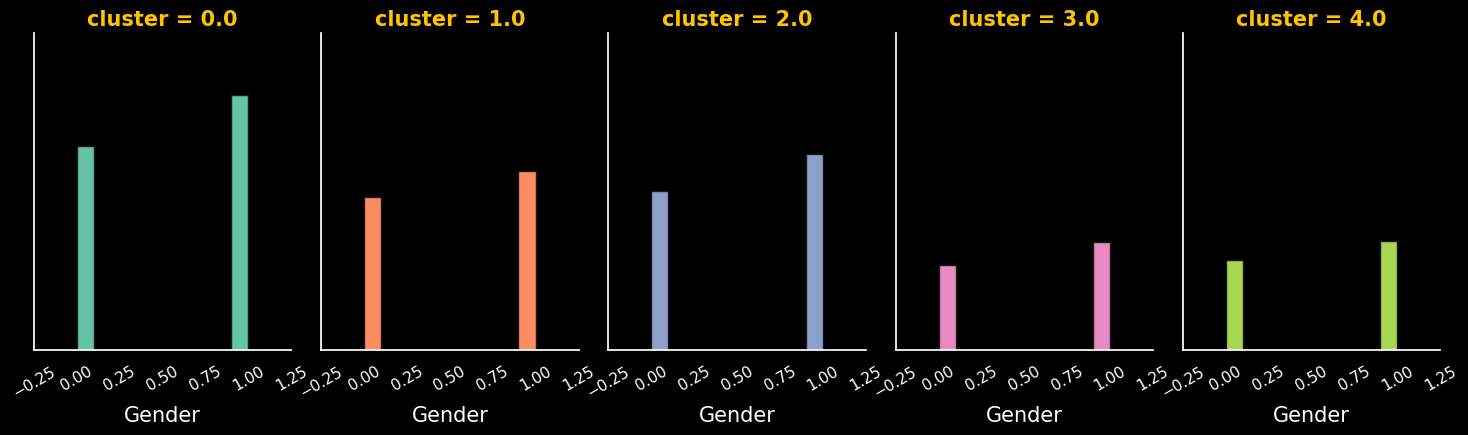

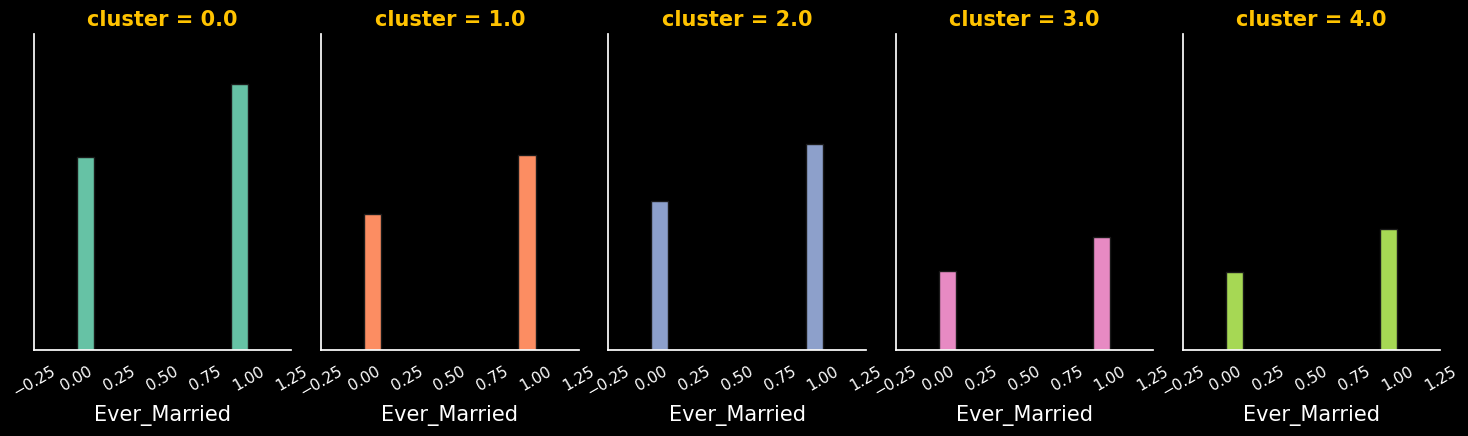

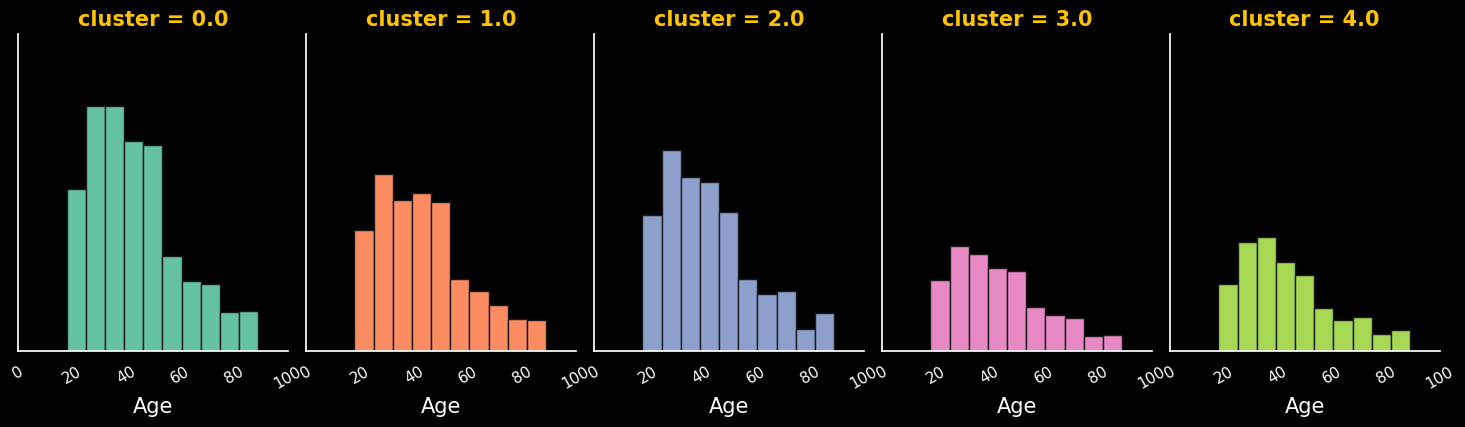

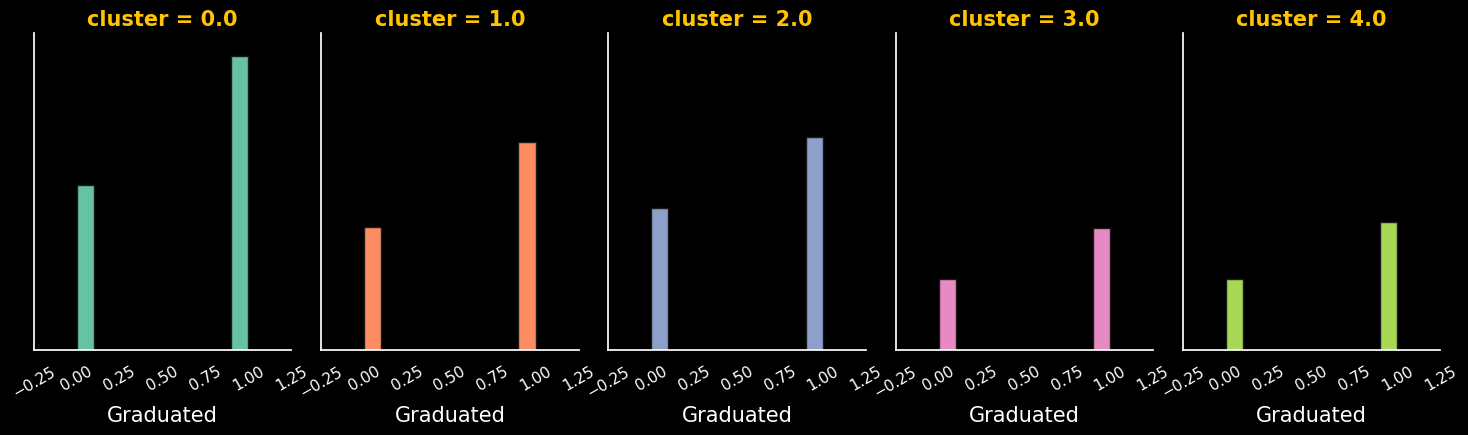

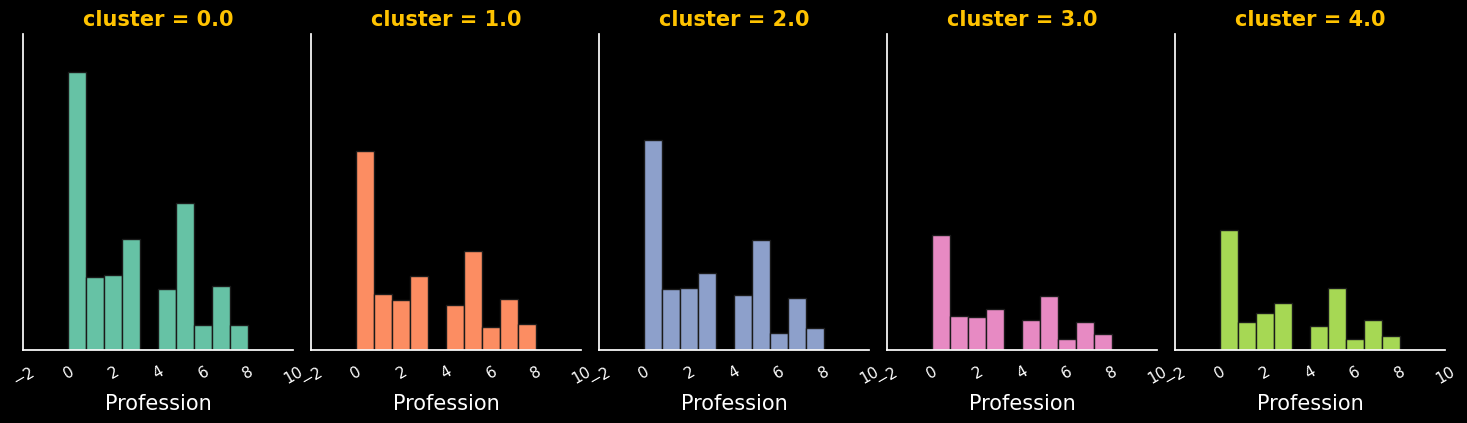

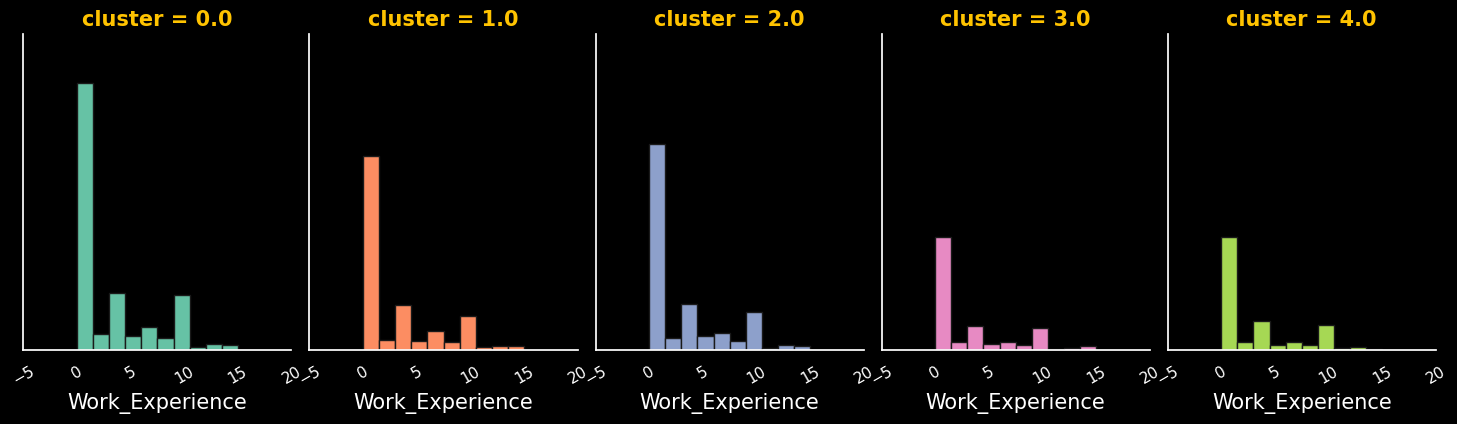

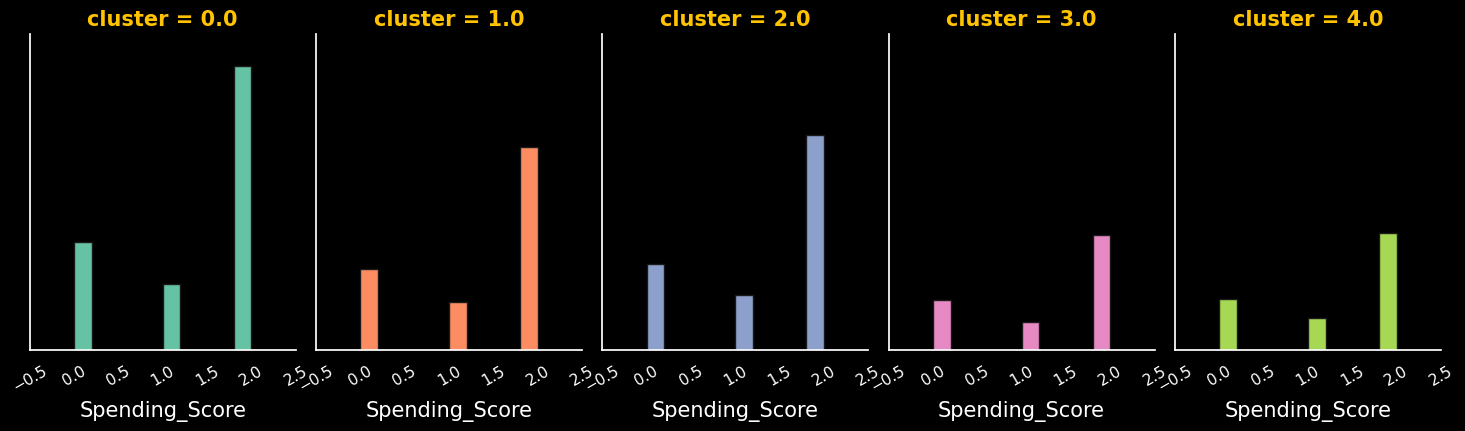

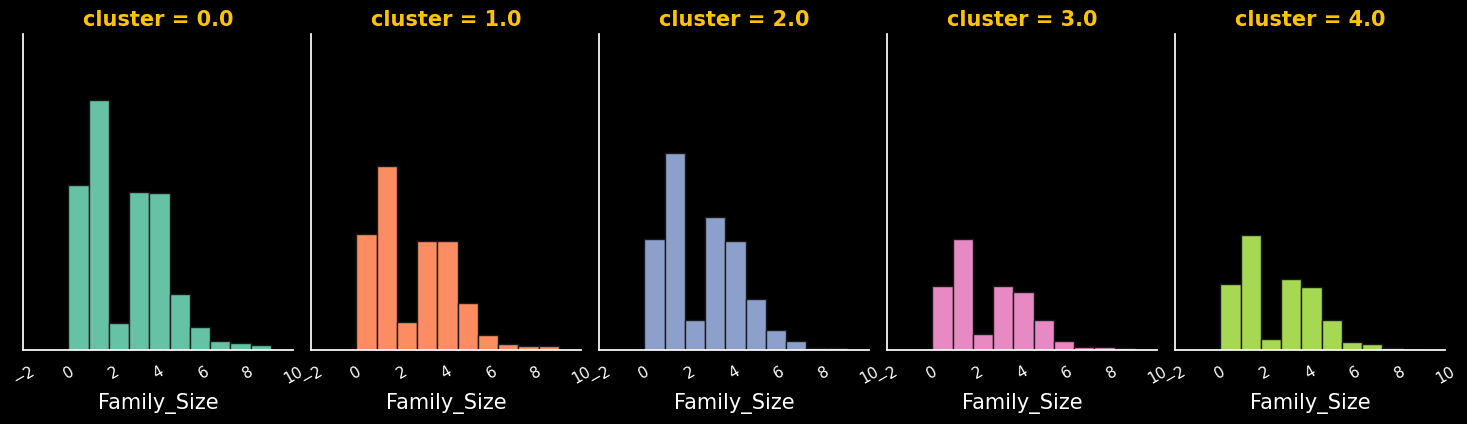

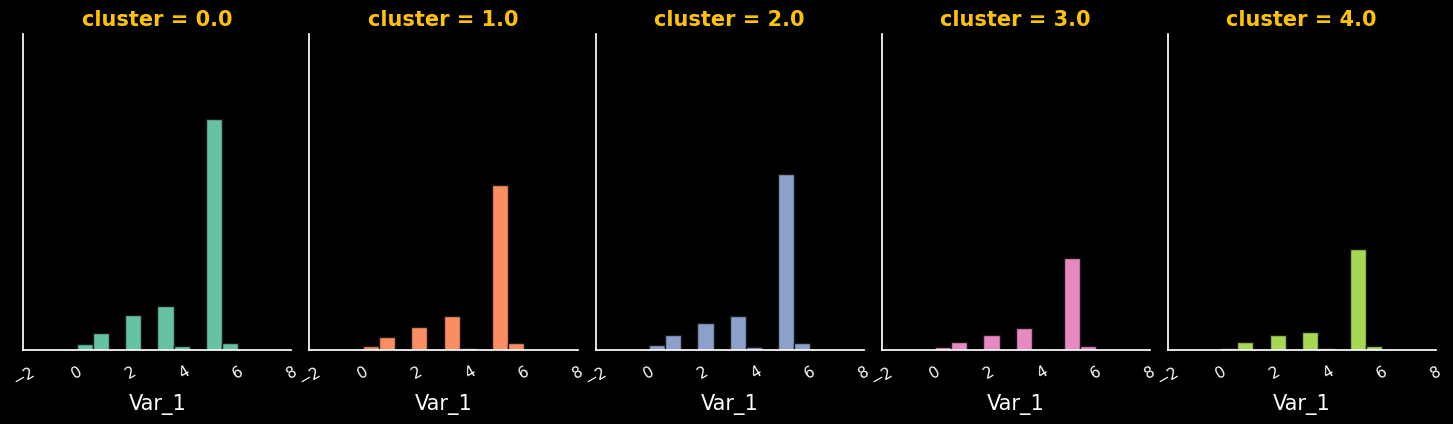

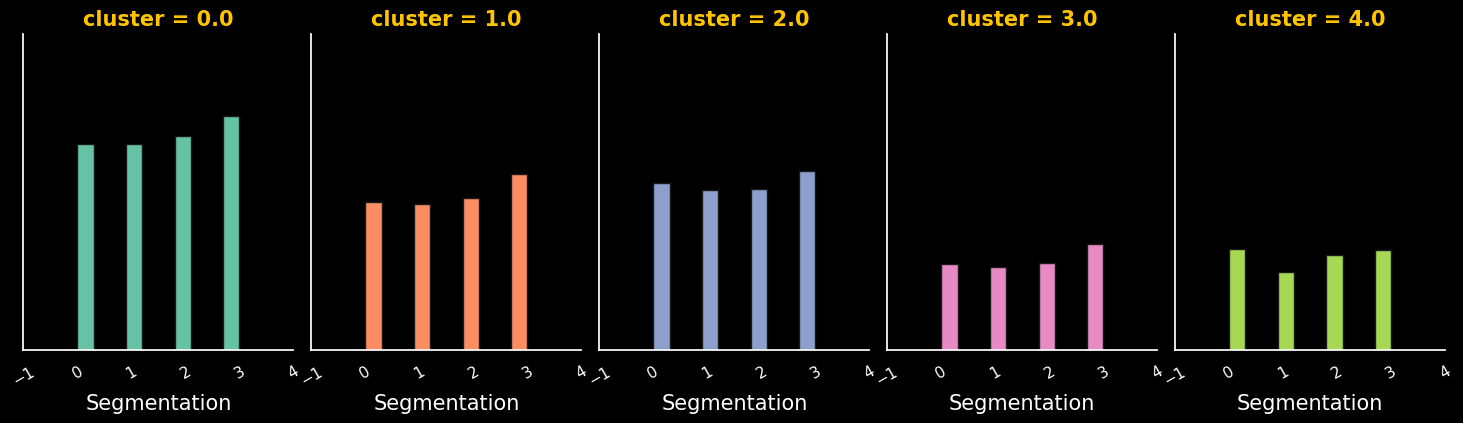

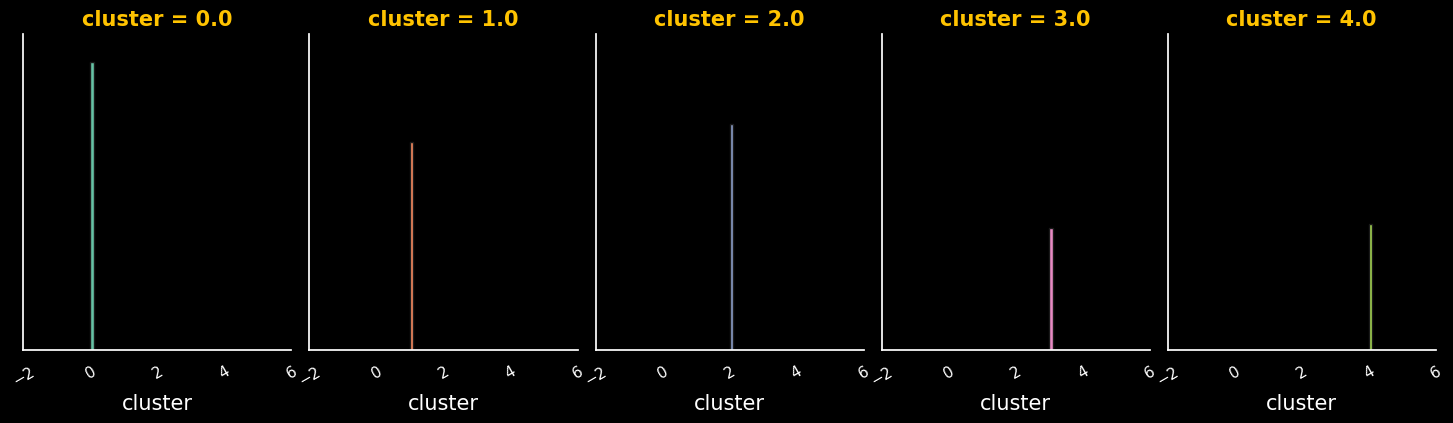

In [ ]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})

for i in df_cluster:
    g = sns.FacetGrid(df_cluster, col = "cluster", hue = "cluster", palette = "Set2")
    g.map(plt.hist, i, bins=10, ec="k")
    g.set_xticklabels(rotation=30, color = 'white')
    g.set_yticklabels(color = 'white')
    g.set_xlabels(size=15, color = 'white')
    g.set_titles(size=15, color = '#FFC300', fontweight="bold")
    g.fig.set_figheight(5);

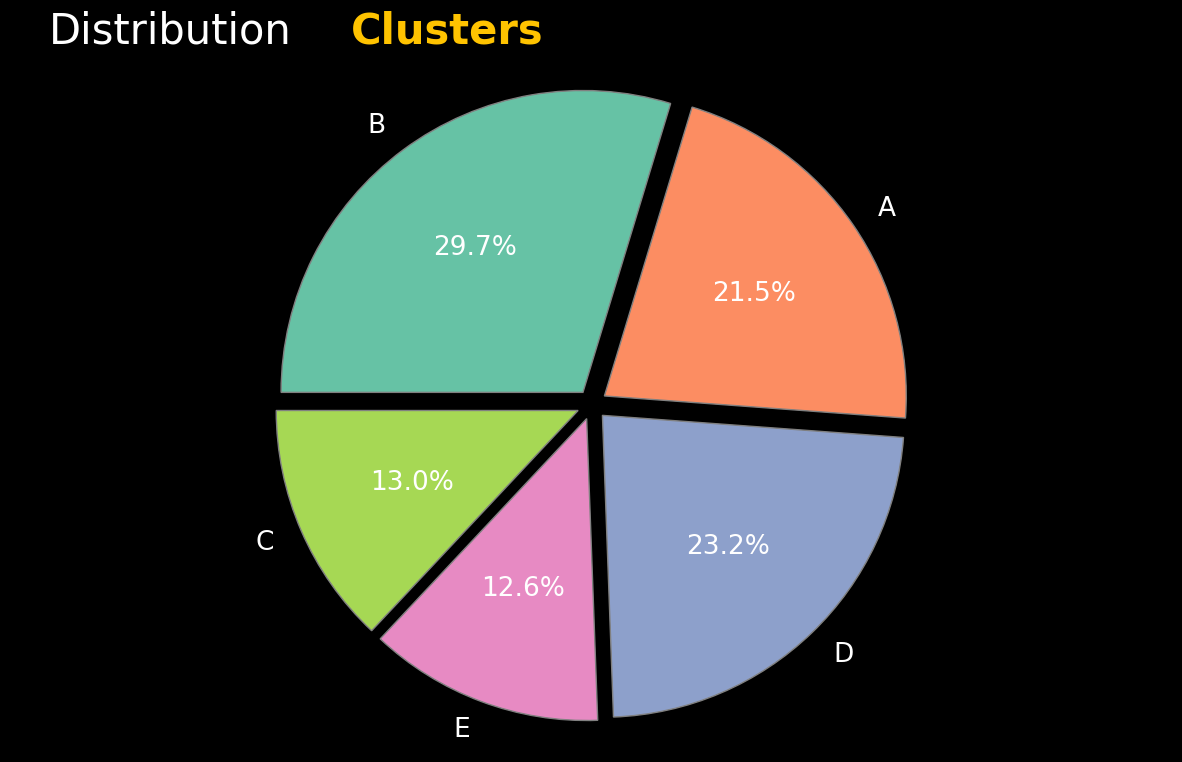

In [ ]:
import matplotlib as ml

clusters_count = df_cluster['cluster'].value_counts()
clusters_count = clusters_count.to_frame().reset_index()
clusters_count.columns = ['clusters', 'count']
clusters_count = clusters_count.sort_values('clusters', ascending = True)

labels = ["B","A","D","E","C"]

plt.figure(figsize=(15,9))
ml.rcParams['font.size'] = 17
colors = sns.color_palette('Set2')[0:5]
plt.pie(clusters_count['count'],
        explode=(0.05, 0.05, 0.05, 0.05, 0.05),
        labels = labels,
        colors= colors,
        autopct='%1.1f%%',
        textprops = dict(color ="white", fontsize=19),
        counterclock = False,
        startangle=180,
        wedgeprops={"edgecolor":"gray",'linewidth':1}
        )

plt.axis('equal')
plt.text(-0.8, 1.2, "Clusters", size=30, color="#FFC300", fontweight="bold")
plt.text(-1.8, 1.2, "Distribution", size=30, color="white")
plt.show();

### **Hierarchical Grouping**

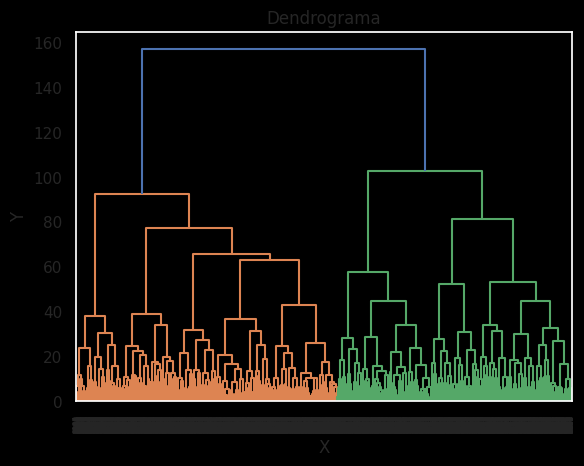

In [ ]:
dendrograma = dendrogram(linkage(df_scaled, method='ward'))
plt.title('Dendrograma')
plt.xlabel('X')
plt.ylabel('Y');

In [ ]:
hc_g = AgglomerativeClustering(n_clusters=3, linkage = 'ward')
rotulos = hc_g.fit_predict(df_scaled)

### **DBSCAN**

In [ ]:
dbscan_g = DBSCAN(eps = 0.95, min_samples=2)
dbscan_g.fit(df)

DBSCAN(eps=0.95, min_samples=2)

In [ ]:
rotulos2 = dbscan_g.labels_
rotulos2

array([  0,  -1,  -1, ..., 169,  -1,  -1])

### **Comparison of Models**

In [ ]:
X_random, y_random = datasets.make_moons(n_samples=1500, noise = 0.09)

In [ ]:
grafico = px.scatter(x = X_random[:,0], y = X_random[:,1])
grafico.show()

In [ ]:
#Kmeans
kmeans = KMeans(n_clusters=2)
rotulos = kmeans.fit_predict(X_random)
grafico = px.scatter(x = X_random[:,0], y = X_random[:, 1], color = rotulos)
grafico.show()

In [ ]:
hc = AgglomerativeClustering(n_clusters=2,  linkage='ward')
rotulos = hc.fit_predict(X_random)
grafico = px.scatter(x = X_random[:,0], y = X_random[:, 1], color = rotulos)
grafico.show()

In [ ]:
dbscan = DBSCAN(eps=0.1)
rotulos = dbscan.fit_predict(X_random)
grafico = px.scatter(x = X_random[:,0], y = X_random[:, 1], color = rotulos)
grafico.show()

### **Inference**

The results indicate that certain groups remain unassociated, as represented by dark blue in the visual output. The DBDCAN algorithm demonstrated superior performance in grouping, particularly with a radius parameter set at 0.1, which significantly aids in separation. Despite the small size of our dataset, we could also apply traditional algorithms like k-means for comparative analysis.

Overall, DBDCAN yields better results than k-means, and it operates more efficiently. The effectiveness of the DBDCAN algorithm is enhanced by the inclusion of a threshold distance, making it particularly advantageous for more complex problems and larger datasets.